<a href="https://colab.research.google.com/github/ht182748678/Green-plate/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [53]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "tong-421311"
dataset_name = "bdao_ima_4d"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [54]:
# Query all data from the table
query = f"""
    SELECT stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsTakeOut,
    RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,Parking
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()
df=restaurant_df
print(df)


       stars  RestaurantsDelivery  OutdoorSeating  BusinessAcceptsCreditCards  \
0        4.0                 True            <NA>                        <NA>   
1        3.5                 <NA>            <NA>                        <NA>   
2        5.0                 <NA>            <NA>                        <NA>   
3        5.0                False            <NA>                        True   
4        2.5                 True            <NA>                        <NA>   
...      ...                  ...             ...                         ...   
52281    3.0                 True            True                        True   
52282    3.5                False            True                        True   
52283    3.0                False           False                        True   
52284    4.5                False           False                        True   
52285    4.0                 True            True                        True   

       RestaurantsTakeOut  

In [55]:
df.dtypes

stars                         float64
RestaurantsDelivery           boolean
OutdoorSeating                boolean
BusinessAcceptsCreditCards    boolean
RestaurantsTakeOut            boolean
RestaurantsReservations       boolean
GoodForKids                   boolean
RestaurantsGoodForGroups      boolean
HasTV                         boolean
Parking                       boolean
dtype: object

In [56]:
df.isnull().sum()

stars                             0
RestaurantsDelivery            7224
OutdoorSeating                10403
BusinessAcceptsCreditCards     6739
RestaurantsTakeOut             4654
RestaurantsReservations        9429
GoodForKids                   11331
RestaurantsGoodForGroups      10867
HasTV                         10387
Parking                        6659
dtype: int64

In [57]:
df = restaurant_df.dropna(axis=0)
df.isnull().sum()

stars                         0
RestaurantsDelivery           0
OutdoorSeating                0
BusinessAcceptsCreditCards    0
RestaurantsTakeOut            0
RestaurantsReservations       0
GoodForKids                   0
RestaurantsGoodForGroups      0
HasTV                         0
Parking                       0
dtype: int64

In [58]:
boolean_columns = [
    'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
    'RestaurantsTakeOut', 'RestaurantsReservations', 'GoodForKids',
    'RestaurantsGoodForGroups', 'HasTV', 'Parking'
]


boolean_columns = [col for col in df.columns if df[col].dtype == 'boolean']


df[boolean_columns] = df[boolean_columns].astype(int)

print(df.head())
print(df.shape)

     stars  RestaurantsDelivery  OutdoorSeating  BusinessAcceptsCreditCards  \
25     2.0                    1               0                           1   
326    1.5                    1               1                           1   
371    3.5                    1               0                           1   
572    3.5                    0               0                           1   
586    2.5                    1               1                           1   

     RestaurantsTakeOut  RestaurantsReservations  GoodForKids  \
25                    1                        0            1   
326                   1                        0            1   
371                   1                        0            1   
572                   1                        0            1   
586                   1                        1            1   

     RestaurantsGoodForGroups  HasTV  Parking  
25                          0      1        0  
326                         1      1  

<ipython-input-58-07dd28e22ee2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[boolean_columns] = df[boolean_columns].astype(int)


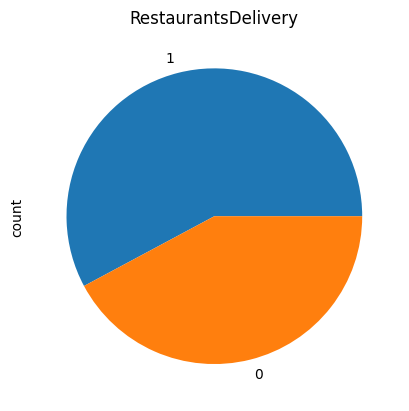

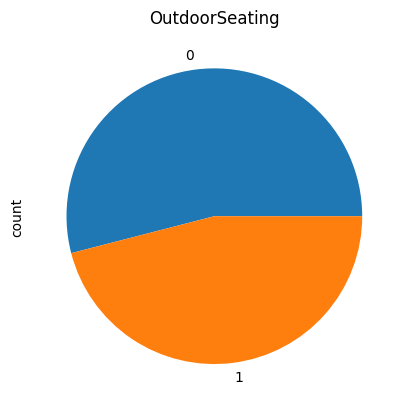

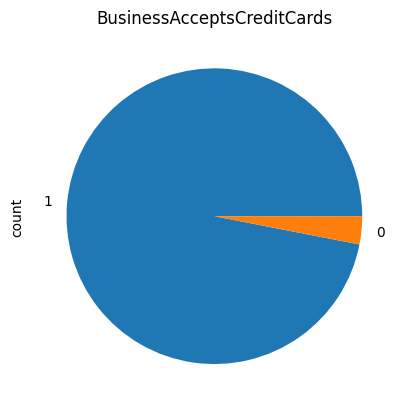

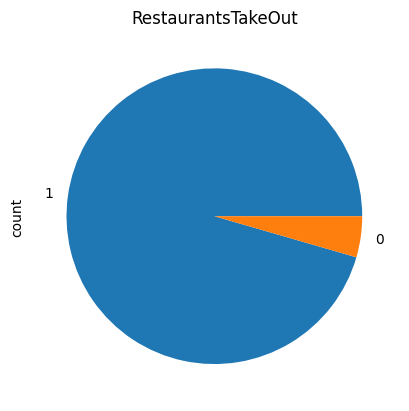

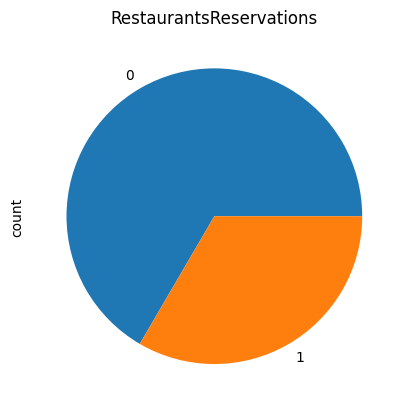

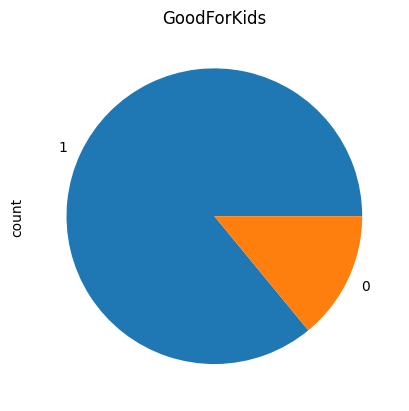

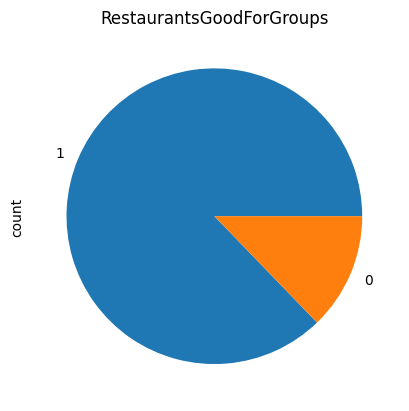

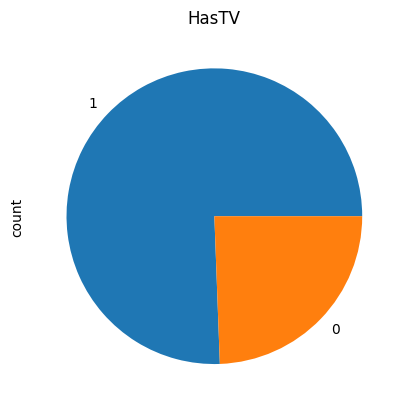

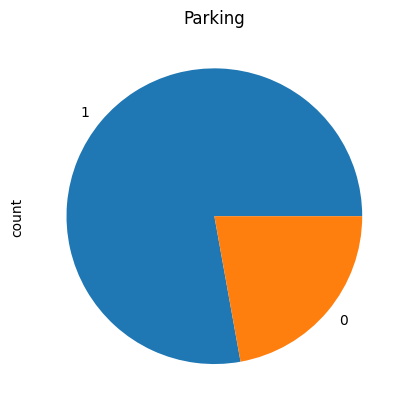

In [62]:
import matplotlib.pyplot as plt


for col in boolean_columns:
    df[col].value_counts().plot(kind='pie')
    plt.title(col)
    plt.show()


Downloading


In [44]:
df.to_csv('modeling.csv', index=False)

In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [48]:
X = df.drop('stars', axis=1)
y = df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

R² Score: 0.13625911168136262


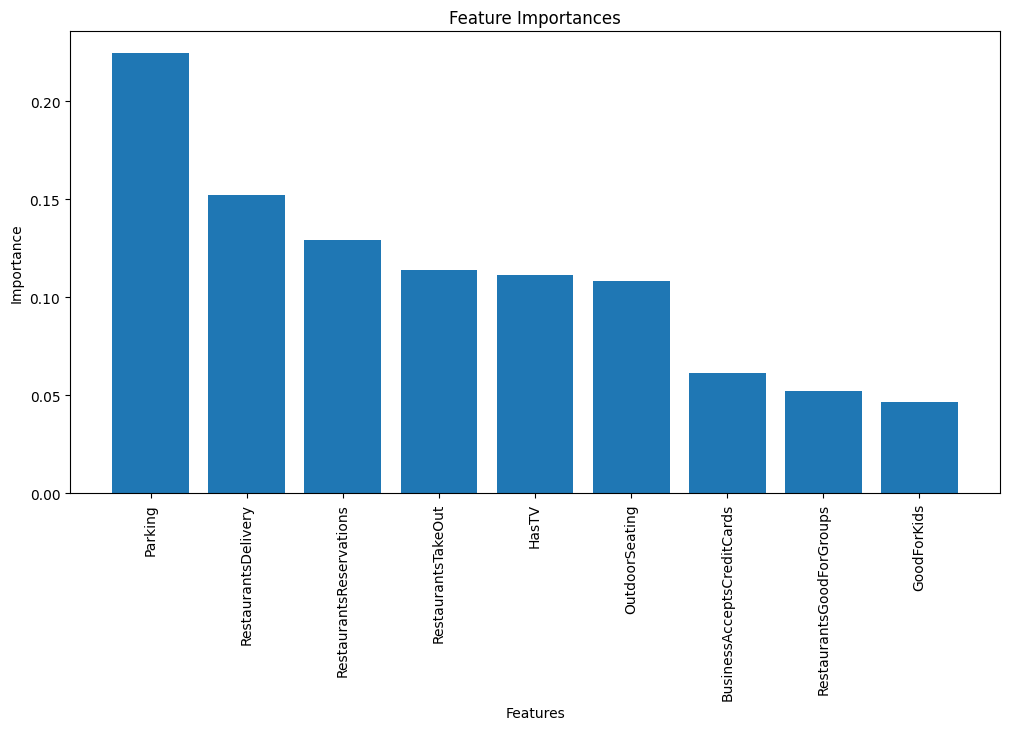

In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()